# Test Initialization on Neural Network

## Table of Contents

* [1. Build a L-layers Neural Network ](#chapter1)
    * [1.1 Initialize parameters](#section_1_1)
    * [1.2 Forward propagation](#section_1_2)
    * [1.3 Cost function](#section_1_3)
    * [1.4 Backward Propagation](#section_1_4)
    * [1.5 Update parameters](#section_1_5) 
    * [1.6 Predict](#section_1_6) 
    * [1.7 Model](#section_1_7)
* [2. Example on Dataset 1](#chapter2)
    * [2.1 Load the Dataset](#section_2_1)
    * [2.2 Display the Data](#section_2_2)
    * [2.3 Flatten the data](#section_2)
    * [2.4 Normalize the data](#section_2_4)
* [3. Example on Dataset 2](#chapter3)
    

In [1]:
# Packages
import copy
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss


%matplotlib inline

# 1. Build a L-layer Neural Network <a class="anchor" id="chapter1"></a>

## 1.1 initialization parameters  <a class="anchor" id="section_1_1"></a>

In [138]:
def initialize_parameters(layers_dims,n_input,n_output,type_init="random"):
    """
    Compute the initialization of the parameters in our Neural Network

    - Arguments:
    layers_dims: array containing the dimension of the hidden layers
    n_input: numbers of features in the input layer
    n_ouput: numbers of nodes in the output layer
    type_init: "zeros","random","he" type of initialization

    - Return:
    parameters: dictionnary containing of the parameters of our neural network
    """

    # init
    parameters = {}

    # add the output layer to the array
    layers_dims.append(n_output)

    # number of layers
    L = len(layers_dims)

    for i in range(L):
        
        # if i==0 take n_x features
        if i ==0:
            layer_prev = n_input
        else:
            layer_prev = layers_dims[i-1]


        # check type of initialization
        if type_init.lower() == "random":

            parameters["W" + str(i+1)] = np.random.randn(layers_dims[i],layer_prev) *3.5
            parameters["b" + str(i+1)] = np.zeros((layers_dims[i],1))

        elif type_init.lower() == "zeros":

            parameters["W" + str(i+1)] = np.zeros((layers_dims[i],layer_prev))
            parameters["b" + str(i+1)] = np.zeros((layers_dims[i],1))
        
        elif type_init.lower() == "he":

            parameters["W" + str(i+1)] = np.random.randn(layers_dims[i],layer_prev) * np.sqrt(2/layer_prev)
            parameters["b" + str(i+1)] = np.zeros((layers_dims[i],1))

        else:
            # default init
            parameters["W" + str(i+1)] = np.random.randn(layers_dims[i],layer_prev) * np.sqrt(2/layer_prev)
            parameters["b" + str(i+1)] = np.zeros((layers_dims[i],1))


    return parameters

In [3]:
# test initialization
hidden_layers_dim = [5,5,3]
n_input = 2
n_output = 1

params = initialize_parameters(hidden_layers_dim,n_input,n_output,"random")
params

{'W1': array([[ 11.32560366,  -3.26043072],
        [ -2.11363361,  -4.14921609],
        [ -4.08071049, -13.67506506],
        [  9.58239619,  -9.16575335],
        [  8.16774933,  -7.11651153]]),
 'b1': array([[0.],
        [0.],
        [0.],
        [0.],
        [0.]]),
 'W2': array([[ 19.68693908,  18.34366201,  10.59021041, -13.00776998,
          -0.25951835],
        [ -4.13002775,  14.09642669,  -3.23203552,   7.88064143,
         -12.33612276],
        [  2.50541358,  -4.40450762,  -8.51534481,   5.31997459,
          -7.0632816 ],
        [  0.99583807,   3.5692665 ,  10.22561226,  17.05603498,
          -2.97087116],
        [  0.82053045,  -9.18743069,  -0.89199566, -22.23700812,
           4.25948501]]),
 'b2': array([[0.],
        [0.],
        [0.],
        [0.],
        [0.]]),
 'W3': array([[ -7.08581924,   8.69877027,  -0.59588335,  -3.4479965 ,
           0.25808352],
        [  5.13541146,  18.04046724,   7.58992139, -11.12741265,
         -10.86649237],
        [

## 1.2 Forward propagation <a class="anchor" id="section_1_2"></a>

In [4]:
def activation_function(Z,activation_name):

    if activation_name.lower() == "sigmoid":

        A = 1/(1+np.exp(-Z))
    
    elif activation_name.lower() == "relu":

        A = np.maximum(0,Z)

    elif activation_name.lower() == "tanh":

        A = np.tanh(Z)
    
    else:
        # By default relu
        A = np.maximum(0,Z)

    return A

In [21]:
def forward_propagation(X,parameters,activation_name="relu"):

    """
    Compute the activation function
    
    Arguments:
    activation_name -- name of the activation function choosen
    Z -- items

    Returns:
    activation -- activation value
    """
    # init cache
    caches = []
    cache_layer = {}

    # layer
    L = len(parameters)//2

    # setting A_prev to X
    A_prev = X

    for i in range(1,L+1):

        # getting parameters
        W = parameters["W" + str(i)]
        b= parameters["b" + str(i)]

        # linear result
        Z = np.dot(W,A_prev) + b

        if i==L:
            # last layer -  sigmoid 
            A = activation_function(Z,"sigmoid")
        else:
            A = activation_function(Z,"relu")

        # adding to the cache
        cache = {"W" : W, "b":b,"A":A,"Z":Z,"A_prev": A_prev}

        # adding layer cache
        caches.append(cache)

        # setting A_prev
        A_prev = A

    return A, caches

In [22]:
# test forward propagation

layers_dim = [5,5,3]
X = np.random.randn(2,100) *0.01
params = initialize_parameters(layers_dim,X.shape[0],1)

AL,caches = forward_propagation(X,params)

# check the shape of W 
for val in caches:
    print("W shape:",val["W"].shape,"b shape:",val["b"].shape)

W shape: (5, 2) b shape: (5, 1)
W shape: (5, 5) b shape: (5, 1)
W shape: (3, 5) b shape: (3, 1)
W shape: (1, 3) b shape: (1, 1)


## 1.3 Compute Loss <a class="anchor" id="section_1_3"></a>

In [91]:
def cost_function(AL,y):

    """
    Compute the log loss L(y_pred,y)

    -- Arguments:
    y : true labels of the dataset
    AL : result of the forward propagation 

    -- Returns:
    cost : Log loss cost

    """
    # m examples
    m = y.shape[1]

    epsilon = 1e-15

    cost = (np.multiply(y,np.log(AL+epsilon)) + np.multiply(1-y,np.log(1-AL+epsilon)))
    cost = -(1/m) *np.nansum(cost)
    
    return cost

In [92]:
# Test the cost
y_true = np.random.randint(0,2,(1,100))
y_pred = np.random.random((1,100))

# check with the true log_loss
cost = cost_function(y_pred,y_true)
l_cost = log_loss(y_true.T,y_pred.T)
print("cost_function result:",cost)
print("log_loss sklearn:",l_cost)

cost_function result: 1.0427831386133244
log_loss sklearn: 1.0427831386133297


## 1.4 Backward propagation <a class="anchor" id="section_1_4"></a>

In [93]:
def backward_activation(dA,Z,function_name="relu"):

    """
    Compute dZ for the backward propagation

    -- Arguments:
    dA : derivative of A
    Z : linear activation
    function_name: name of the activation_function

    -- Returns:
    dZ: derivative of Z
    """

    if function_name.lower() == "sigmoid":
        # sigmoid
        s = 1/(1+np.exp(-Z))

        # derivative sigmoid
        dG = s*(1-s)

        # dZ
        dZ = dA * dG

    elif function_name.lower() == "relu":

        # relu
        r = np.maximum(0,Z)

        # derivative relu
        dG = np.int64(r>0)

        # dZ
        dZ = np.multiply(dA,dG)

    elif function_name.lower() == "tanh":

        # tanh
        th = np.tanh(Z)

        # derivative tanh
        dG = 1-np.power(th,2)

        # dZ
        dZ = dA * dG

    else:
        # by default relu
        r = np.maximum(0,Z)

        # derivative relu
        dG = np.int64(r>0)

        # dZ
        dZ = np.multiply(dA,dG)

    return dZ

In [94]:
def backward_propagation(AL,y,caches,function_name="relu"):

    # gradients
    gradients = {}

    # numbers of layers
    L = len(caches)

    # number of examples
    m = y.shape[1]

    # dAL
    dAL = - (np.divide(y, AL) - np.divide(1 - y, 1 - AL))
    
    # getting cache layer L
    current_cache = caches[-1]
    WL = current_cache['W']
    ZL = current_cache['Z']
    A_prev = current_cache['A_prev']

    dZL = backward_activation(dAL,ZL,"sigmoid")

    dW_temp = (1/m)*np.dot(dZL,A_prev.T)
    db_temp = (1/m) * np.sum(dZL,axis=1, keepdims=True)
    dA_prev_temp = np.dot(WL.T,dZL)
    
    # compute the gradient
    gradients["dW" + str(L)] = dW_temp
    gradients["db" + str(L)] = db_temp


    for i in reversed(range(L-1)):

        # getting cache layer L
        current_cache = caches[i]
        W = current_cache['W']
        Z = current_cache['Z']
        A_prev = current_cache['A_prev']

        dZ = backward_activation(dA_prev_temp,Z,function_name)

        dW_temp = (1/m)*np.dot(dZ,A_prev.T)
        db_temp = (1/m) * np.sum(dZ,axis=1, keepdims=True)
        dA_prev_temp = np.dot(W.T,dZ)
        
        # compute the gradient
        gradients["dW" + str(i+1)] = dW_temp
        gradients["db" + str(i+1)] = db_temp


    return gradients


In [95]:
# test backward propa

layers_dim = [5,5,4]
X = np.random.randn(10,100)
y_true = np.random.randint(0,2,(1,100))
params = initialize_parameters(layers_dim,X.shape[0],1)

AL,caches = forward_propagation(X,params)
    
gradients = backward_propagation(AL,y_true,caches)
gradients
for i in range(len(caches)):
    print(f"dW{i+1}",gradients[f"dW{i+1}"].shape)

dW1 (5, 10)
dW2 (5, 5)
dW3 (4, 5)
dW4 (1, 4)


<ipython-input-4-3e2a642804e2>:5: RuntimeWarning: overflow encountered in exp
  A = 1/(1+np.exp(-Z))
<ipython-input-94-18c056ca7c10>:13: RuntimeWarning: divide by zero encountered in true_divide
  dAL = - (np.divide(y, AL) - np.divide(1 - y, 1 - AL))
<ipython-input-94-18c056ca7c10>:13: RuntimeWarning: invalid value encountered in true_divide
  dAL = - (np.divide(y, AL) - np.divide(1 - y, 1 - AL))
<ipython-input-93-8be50772606d>:17: RuntimeWarning: overflow encountered in exp
  s = 1/(1+np.exp(-Z))
<ipython-input-93-8be50772606d>:23: RuntimeWarning: invalid value encountered in multiply
  dZ = dA * dG


## 1.5 Update parameters <a class="anchor" id="section_1_5"></a>

In [96]:
def update_parameters(parameters,gradients,learning_rate):

    # copy 
    params = copy.deepcopy(parameters)
    
    # nb layer
    L = len(parameters)//2

    for i in range(L):
        params["W" + str(i+1)] = params["W" + str(i+1)] - learning_rate * gradients["dW" + str(i+1)]
        params["b" + str(i+1)] = params["b" + str(i+1)] - learning_rate * gradients["db" + str(i+1)]

    return params

## 1.6 Predict <a class="anchor" id="section_1_6"></a>

In [97]:
def predict(X,parameters,function_name):

    y_pred,caches = forward_propagation(X,parameters,function_name)

    y_pred = np.where(y_pred>=0.5,1,0)

    return y_pred

In [98]:
def score(X,y,parameters):
    
    # prediction
    y_pred = predict(X,parameters,function_name="relu")

    # score
    acc = accuracy_score(y.T,y_pred.T)

    return acc

## 1.7 Model <a class="anchor" id="section_1_7"></a>

In [105]:
def neural_network_model(X_train,y_train,X_test,y_test,hidden_layers_dims,n_iter,learning_rate,function_name="relu",initialization_weights="random",display=False):

    # init trackers
    dico_model = {}
    costs_train = []
    costs_test = []
    accs_train = []
    accs_test = []

    # init
    m = X.shape[1]
    n_input = X_train.shape[0]
    n_output = y_train.shape[0]

    # initialize parameters
    parameters = initialize_parameters(hidden_layers_dims,n_input,n_output,initialization_weights)


    for i in range(n_iter):

        # ---- forward propagation ------
        AL_train, caches = forward_propagation(X_train,parameters, activation_name=function_name)
        AL_test, caches_test = forward_propagation(X_test,parameters, activation_name=function_name)

        #  cost
        cost_train = cost_function(AL_train,y_train)
        costs_train.append(cost_train)

        cost_test = cost_function(AL_test,y_test)
        costs_test.append(cost_test)

        # accuracy 
        y_pred_train = predict(X_train,parameters,function_name)
        acc_train = accuracy_score(y_train.T,y_pred_train.T)
        accs_train.append(acc_train)

        y_pred_test = predict(X_test,parameters,function_name)
        acc_test = accuracy_score(y_test.T,y_pred_test.T)
        accs_test.append(acc_test)    

        # ---- bacward propagation ------
        gradients = backward_propagation(AL_train,y_train,caches,function_name)

        # ---- update params ------------
        params = update_parameters(parameters, gradients, learning_rate)
        parameters = params
        
        if display is True and i%500 == 0:
            print(f"iter {i} : Train_Loss = {cost_train}, Train_acc = {acc_train},Test_Loss = {cost_test}, Test_acc = {acc_test}")

    dict_model = {"parameters": parameters,"cost_train":costs_train,"accuracy_train":accs_train,"cost_test":costs_test,"accuracy_test":accs_test}

    return dict_model


# 2. Example on dataset 1 <a class="anchor" id="chapter2"></a>

## 2.1 Load Dataset  <a class="anchor" id="section_2_1"></a>

In [106]:
def load_dataset():
    np.random.seed(1)
    train_X, train_Y = sklearn.datasets.make_circles(n_samples=300, noise=.05)
    np.random.seed(2)
    test_X, test_Y = sklearn.datasets.make_circles(n_samples=100, noise=.05)
    # Visualize the data
    plt.scatter(train_X[:, 0], train_X[:, 1], c=train_Y, s=40, cmap=plt.cm.Spectral);
    train_X = train_X.T
    train_Y = train_Y.reshape((1, train_Y.shape[0]))
    test_X = test_X.T
    test_Y = test_Y.reshape((1, test_Y.shape[0]))
    
    return train_X, train_Y, test_X, test_Y

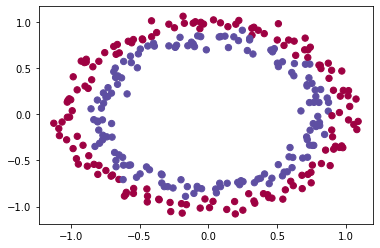

In [107]:
X_train, y_train, X_test, y_test = load_dataset()

## 2.2 Train zeros Initialization <a class="anchor" id="section_2_2"></a>

In [124]:
hidden_layers_dims = [10,5]
n_iter = 5000
learning_rate = 0.01

dict_model = neural_network_model(X_train,y_train,X_test,y_test,hidden_layers_dims,n_iter,learning_rate,function_name="relu",initialization_weights="zeros",display=True)

iter 0 : Train_Loss = 0.6931471805599434, Train_acc = 0.5,Test_Loss = 0.6931471805599436, Test_acc = 0.5
iter 500 : Train_Loss = 0.6931471805599434, Train_acc = 0.5,Test_Loss = 0.6931471805599436, Test_acc = 0.5
iter 1000 : Train_Loss = 0.6931471805599434, Train_acc = 0.5,Test_Loss = 0.6931471805599436, Test_acc = 0.5
iter 1500 : Train_Loss = 0.6931471805599434, Train_acc = 0.5,Test_Loss = 0.6931471805599436, Test_acc = 0.5
iter 2000 : Train_Loss = 0.6931471805599434, Train_acc = 0.5,Test_Loss = 0.6931471805599436, Test_acc = 0.5
iter 2500 : Train_Loss = 0.6931471805599434, Train_acc = 0.5,Test_Loss = 0.6931471805599436, Test_acc = 0.5
iter 3000 : Train_Loss = 0.6931471805599434, Train_acc = 0.5,Test_Loss = 0.6931471805599436, Test_acc = 0.5
iter 3500 : Train_Loss = 0.6931471805599434, Train_acc = 0.5,Test_Loss = 0.6931471805599436, Test_acc = 0.5
iter 4000 : Train_Loss = 0.6931471805599434, Train_acc = 0.5,Test_Loss = 0.6931471805599436, Test_acc = 0.5
iter 4500 : Train_Loss = 0.69314

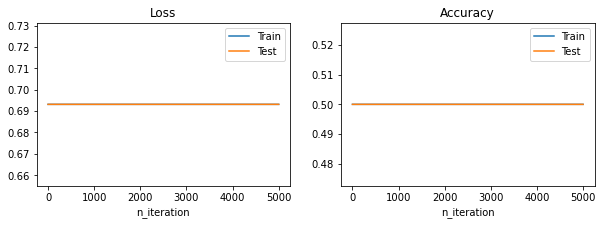

In [125]:
# Display the result

fig, axs = plt.subplots(1, 2, figsize=(10, 3))

axs[0].plot(dict_model["cost_train"])
axs[0].plot(dict_model["cost_test"])
axs[0].set_title("Loss")
axs[0].set_xlabel("n_iteration")
axs[0].legend(["Train","Test"])

axs[1].plot(dict_model["accuracy_train"])
axs[1].plot(dict_model["accuracy_test"])
axs[1].set_title("Accuracy")
axs[1].set_xlabel("n_iteration")
axs[1].legend(["Train","Test"])
plt.show()

__Note__: For sake of simplicity calculations below are done using only one example at a time.

Since the weights and biases are zero, multiplying by the weights creates the zero vector which gives 0 when the activation function is ReLU. As `z = 0`

$$a = ReLU(z) = max(0, z) = 0$$

At the classification layer, where the activation function is sigmoid you then get (for either input): 

$$\sigma(z) = \frac{1}{ 1 + e^{-(z)}} = \frac{1}{2} = y_{pred}$$

As for every example you are getting a 0.5 chance of it being true our cost function becomes helpless in adjusting the weights.

Your loss function:
$$ \mathcal{L}(a, y) =  - y  \ln(y_{pred}) - (1-y)  \ln(1-y_{pred})$$

For `y=1`, `y_pred=0.5` it becomes:

$$ \mathcal{L}(0, 1) =  - (1)  \ln(\frac{1}{2}) = 0.6931471805599453$$

For `y=0`, `y_pred=0.5` it becomes:

$$ \mathcal{L}(0, 0) =  - (1)  \ln(\frac{1}{2}) = 0.6931471805599453$$

As you can see with the prediction being 0.5 whether the actual (`y`) value is 1 or 0 you get the same loss value for both, so none of the weights get adjusted and you are stuck with the same old value of the weights. 

This is why you can see that the model is predicting 0 for every example! No wonder it's doing so badly.

In general, initializing all the weights to zero results in the network failing to break symmetry. This means that every neuron in each layer will learn the same thing, so you might as well be training a neural network with $n^{[l]}=1$ for every layer. This way, the network is no more powerful than a linear classifier like logistic regression. 

## 2.3 Train random Initialization <a class="anchor" id="section_2_3"></a>

In [139]:
hidden_layers_dims = [10,5]
n_iter = 15000
learning_rate = 0.01

dict_model = neural_network_model(X_train,y_train,X_test,y_test,hidden_layers_dims,n_iter,learning_rate,function_name="relu",initialization_weights="random",display=True)

iter 0 : Train_Loss = 14.139791079518492, Train_acc = 0.49333333333333335,Test_Loss = 14.4265410504368, Test_acc = 0.5
iter 500 : Train_Loss = 0.5495299157776623, Train_acc = 0.6433333333333333,Test_Loss = 0.6187836730418209, Test_acc = 0.65
iter 1000 : Train_Loss = 0.44570709697878635, Train_acc = 0.7266666666666667,Test_Loss = 0.5312887243908017, Test_acc = 0.71
iter 1500 : Train_Loss = 0.40858127455597265, Train_acc = 0.7666666666666667,Test_Loss = 0.505847905634658, Test_acc = 0.75
iter 2000 : Train_Loss = 0.38067028488534327, Train_acc = 0.8033333333333333,Test_Loss = 0.48703946105049034, Test_acc = 0.8
iter 2500 : Train_Loss = 0.36765832239321405, Train_acc = 0.8133333333333334,Test_Loss = 0.47629124684446544, Test_acc = 0.8
iter 3000 : Train_Loss = 0.3558367628012222, Train_acc = 0.82,Test_Loss = 0.4683207257005244, Test_acc = 0.81
iter 3500 : Train_Loss = 0.34415013814230744, Train_acc = 0.8266666666666667,Test_Loss = 0.4653875680372255, Test_acc = 0.81
iter 4000 : Train_Loss =

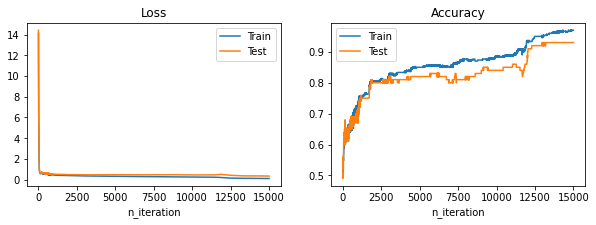

In [140]:
# Display the result

fig, axs = plt.subplots(1, 2, figsize=(10, 3))

axs[0].plot(dict_model["cost_train"])
axs[0].plot(dict_model["cost_test"])
axs[0].set_title("Loss")
axs[0].set_xlabel("n_iteration")
axs[0].legend(["Train","Test"])

axs[1].plot(dict_model["accuracy_train"])
axs[1].plot(dict_model["accuracy_test"])
axs[1].set_title("Accuracy")
axs[1].set_xlabel("n_iteration")
axs[1].legend(["Train","Test"])
plt.show()

## 2.4 Train he Initialization <a class="anchor" id="section_2_4"></a>

In [130]:
hidden_layers_dims = [10,5]
n_iter = 15000
learning_rate = 0.01

dict_model = neural_network_model(X_train,y_train,X_test,y_test,hidden_layers_dims,n_iter,learning_rate,function_name="relu",initialization_weights="he",display=True)

iter 0 : Train_Loss = 0.7670739427359413, Train_acc = 0.51,Test_Loss = 0.7617196714236195, Test_acc = 0.48
iter 500 : Train_Loss = 0.6929270419541506, Train_acc = 0.49666666666666665,Test_Loss = 0.6934853470888308, Test_acc = 0.51
iter 1000 : Train_Loss = 0.6808076098153518, Train_acc = 0.5833333333333334,Test_Loss = 0.6820074867955924, Test_acc = 0.56
iter 1500 : Train_Loss = 0.6710146233356168, Train_acc = 0.5966666666666667,Test_Loss = 0.6734781445278408, Test_acc = 0.57
iter 2000 : Train_Loss = 0.6615187041946639, Train_acc = 0.6133333333333333,Test_Loss = 0.6645863303103865, Test_acc = 0.56
iter 2500 : Train_Loss = 0.651275316784948, Train_acc = 0.64,Test_Loss = 0.6546779576478321, Test_acc = 0.62
iter 3000 : Train_Loss = 0.6391523037773683, Train_acc = 0.6633333333333333,Test_Loss = 0.6425054575140716, Test_acc = 0.66
iter 3500 : Train_Loss = 0.618666298993197, Train_acc = 0.6833333333333333,Test_Loss = 0.6233740159174949, Test_acc = 0.67
iter 4000 : Train_Loss = 0.57864385627173

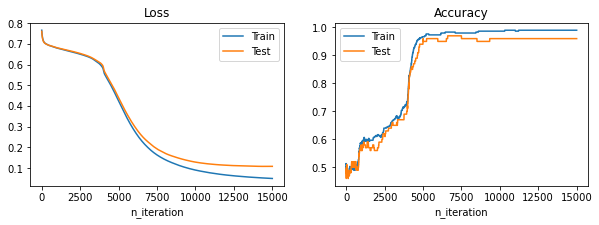

In [131]:
# Display the result

fig, axs = plt.subplots(1, 2, figsize=(10, 3))

axs[0].plot(dict_model["cost_train"])
axs[0].plot(dict_model["cost_test"])
axs[0].set_title("Loss")
axs[0].set_xlabel("n_iteration")
axs[0].legend(["Train","Test"])

axs[1].plot(dict_model["accuracy_train"])
axs[1].plot(dict_model["accuracy_test"])
axs[1].set_title("Accuracy")
axs[1].set_xlabel("n_iteration")
axs[1].legend(["Train","Test"])
plt.show()

- he Initialization have better results than the other initialization
- It improves the learning process of the neural network

# 3. Example on dataset 2 <a class="anchor" id="chapter3"></a>